<a href="https://colab.research.google.com/github/wooihaw/practical_ai/blob/main/handson_4a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! cd /content/
!git clone https://github.com/wooihaw/practical_ai.git

Cloning into 'practical_ai'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 48 (delta 20), reused 13 (delta 3), pack-reused 0
Unpacking objects: 100% (48/48), done.


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Step 1: Load libraries and seed random number generator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split as split
from tensorflow.keras.optimizers import SGD
import numpy
# To do: Import StandardScaler from sklearn.preprocessing

# To do: Import EarlyStopping from tensorflow.keras.callbacks

# fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
#Step 2: Load the dataset and split it into train & test sets
dataset = numpy.loadtxt("practical_ai/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,:-1]
y = dataset[:,-1]
test_size = 0.33
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, random_state=7)

# To do: Scale fetures using StandardSCaler


In [5]:
#Step 3: Define the neural network model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
#Step 4: Compile the neural network model
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [7]:
#Step 5: Fit the neural network to the dataset
# To do: Add early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=8)

Epoch 1/100
65/65 [==============================] - 1s 11ms/step - loss: 2.0223 - accuracy: 0.5754 - val_loss: 0.6777 - val_accuracy: 0.6378
Epoch 2/100
65/65 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.6521 - val_loss: 0.6566 - val_accuracy: 0.6457
Epoch 3/100
65/65 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6381 - val_loss: 0.6431 - val_accuracy: 0.6535
Epoch 4/100
65/65 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.6534 - val_loss: 0.6467 - val_accuracy: 0.6496
Epoch 5/100
65/65 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.6738 - val_loss: 0.6376 - val_accuracy: 0.6417
Epoch 6/100
65/65 [==============================] - 0s 3ms/step - loss: 0.6393 - accuracy: 0.6813 - val_loss: 0.6359 - val_accuracy: 0.6339
Epoch 7/100
65/65 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.6837 - val_loss: 0.6733 - val_accuracy: 0.6339
Epoch 8/100


In [8]:
#Step 6: Evaluate the neural network model on the test set
scores = model.evaluate(X_test, y_test)
print(f"{model.metrics_names[1]}: {100 * scores[1]:.2f} %")

8/8 [==============================] - 0s 3ms/step - loss: 0.6247 - accuracy: 0.6732
accuracy: 67.32 %


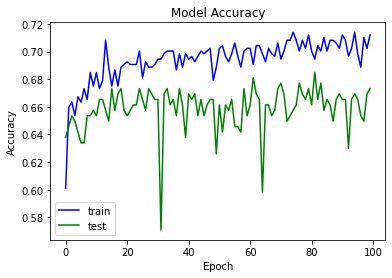

In [9]:
# Step 7: Plot the model accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'b', label='train')
plt.plot(history.history['val_accuracy'], 'g', label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(loc='best')
plt.show()

In [10]:
# To do: Plot the model loss for both training and testing data
